In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [21]:
Tech = ['AAPL', 'MSFT']
Cons_Cyc = ['AMZN', 'BABA']
Healthcare = ['JNJ', 'GILD']
Hotel = ['MAR', 'HLT']
Airlines = ['DAL', 'UAL']
Restaurants = ['MCD', 'QSR']

In [22]:
all_companies = Tech + Cons_Cyc + Healthcare + Hotel + Airlines + Restaurants

In [23]:
stock_prices = pd.DataFrame()
for company in all_companies:
    ticker = yf.Ticker(company)
    df = ticker.history(start="2020-01-01", end="2020-06-30" )
    df['ticker'] = company
    stock_prices = pd.concat([stock_prices, df], axis=0)

In [24]:
stock_prices.loc[:,'Adj close'] = stock_prices.Close - stock_prices.Dividends

In [25]:
stock_prices['Category'] = np.nan

In [26]:
cat = {
     'AAPL' : 'technology',
     'MSFT' : 'technology',
     'AMZN' : 'consumer cyclical',
     'BABA' : 'consumer cyclical',
     'JNJ'  : 'healthcare',
     'GILD' : 'healthcare',
     'MAR'  : 'hotel',
     'HLT'  : 'hotel',
     'DAL'  : 'airlines',
     'UAL'  : 'airlines',
     'MCD'  : 'restaurants',
     'QSR'  : 'restaurants'   
      }

In [27]:
stock_prices.loc[:,'Category'] = stock_prices.replace({'ticker':cat}).ticker

In [28]:
stock_prices.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Adj close,Category
Date,,,,,,,,,,
2019-12-31,287.94,291.67,287.54,291.64,25201400,0.0,0,AAPL,291.64,technology
2020-01-02,294.21,298.54,293.17,298.29,33870100,0.0,0,AAPL,298.29,technology
2020-01-03,295.11,298.52,294.47,295.39,36580700,0.0,0,AAPL,295.39,technology
2020-01-06,291.78,297.90,290.74,297.75,29596800,0.0,0,AAPL,297.75,technology
2020-01-07,297.79,298.84,295.44,296.35,27218000,0.0,0,AAPL,296.35,technology


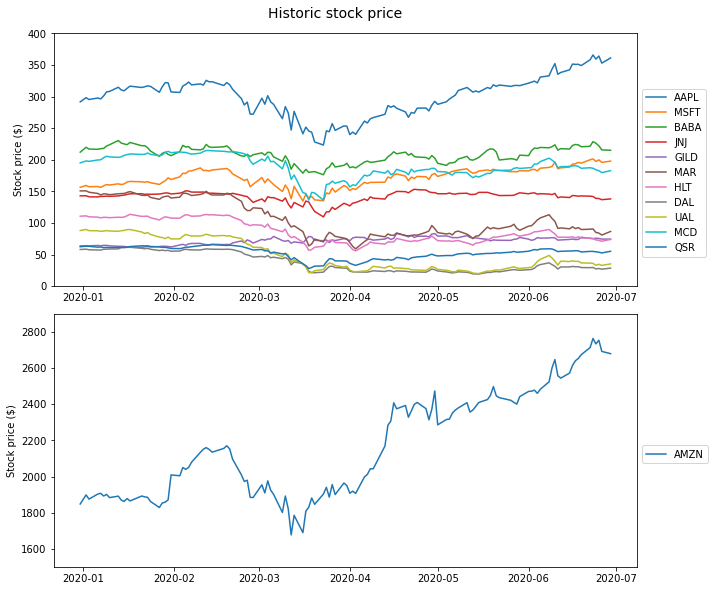

In [29]:
fig_name = 'Historic stock price'
fig, ax = plt.subplots(2,1,figsize=(10,8))

for ticker in stock_prices.ticker.unique():
    if ticker != 'AMZN':        
        ax[0].plot(stock_prices[stock_prices.ticker == ticker].Close, label =ticker)
        ax[0].set_ylim([0,400])
        ax[0].set_ylabel('Stock price ($)')
        ax[0].legend(bbox_to_anchor=(1, 0.8))
    else:
        ax[1].plot(stock_prices[stock_prices.ticker == ticker].Close, label =ticker)
        ax[1].set_ylim([1500,2900])
        ax[1].set_ylabel('Stock price ($)')
        ax[1].legend(bbox_to_anchor=(1.13, 0.5))
    
fig.suptitle(fig_name, fontsize = 14, x = 0.47,y = 1.02)
plt.tight_layout()
fig.savefig(r'c:\Users\jaromir\OneDrive\UoM\100_Disertation\05_Dissertation\01_Figures\\'+fig_name+'.png')
plt.show()

In [30]:
# save file
current_time = str(datetime.now().strftime("%Y%m%d_%H%M%S"))
stock_prices.to_pickle(r"c:\Users\jaromir\OneDrive\UoM\100_Disertation\02_SrcData\04_CleanData\stock_prices_"+current_time+".pkl")